In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from lgbm_full_model import FullLgbmPipeline
from evaluation import ModelSelector
from evaluation import ModelEvaluation

In [3]:
model_config = {
    'target_column': 'anomaly',
    'look_back': 10,
    'num_splits': 2,
    'th' : 0.35
}

In [13]:
selector = ModelSelector(model_config,FullLgbmPipeline,min_splits=1,max_splits=10)

In [14]:
res = selector.select_best(f1_th=0.9)

Run model number 3


[LightGBM] [Info] Number of positive: 1443, number of negative: 2791
[LightGBM] [Info] Total Bins 6103
[LightGBM] [Info] Number of data points in the train set: 4234, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.340812 -> initscore=-0.659676
[LightGBM] [Info] Start training from score -0.659676
[LightGBM] [Info] Number of positive: 1258, number of negative: 2976
[LightGBM] [Info] Total Bins 6103
[LightGBM] [Info] Number of data points in the train set: 4234, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.297119 -> initscore=-0.861057
[LightGBM] [Info] Start training from score -0.861057
[LightGBM] [Info] Number of positive: 1608, number of negative: 2627
[LightGBM] [Info] Total Bins 6100
[LightGBM] [Info] Number of data points in the train set: 4235, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379693 -> initscore=-0.490851
[LightGBM] [Info] Start training from score -0.490851
[LightGBM] [W

,f1,mar,far
model_7,0.897000,0.186800,0.000000
model_9,0.897700,0.185600,0.000000
model_8,0.900000,0.181800,0.000000
model_6,0.903000,0.176800,0.000000
model_3,0.903000,0.159400,0.024600
model_5,0.898300,0.158200,0.037000
model_10,0.895600,0.150700,0.052800
model_4,0.742500,0.048600,0.391200


,f1,mar,far
model_7,0.897000,0.186800,0.000000


In [16]:
base_preds = pd.read_csv('../data/lgbm_baseline_predictions.csv')['y_pred']

In [17]:
eval_config = {
    'baseline' : {
        'y_test' :res['model'].y_test,
        'y_pred': base_preds.values,
        'th': 0.5
    },
    
    res['model_name'] : {
        'y_test' :res['model'].y_test,
        'y_pred':res['predictions'].values,
        'th' : 0.35
    }
}

In [18]:
eval = ModelEvaluation(eval_config=eval_config)

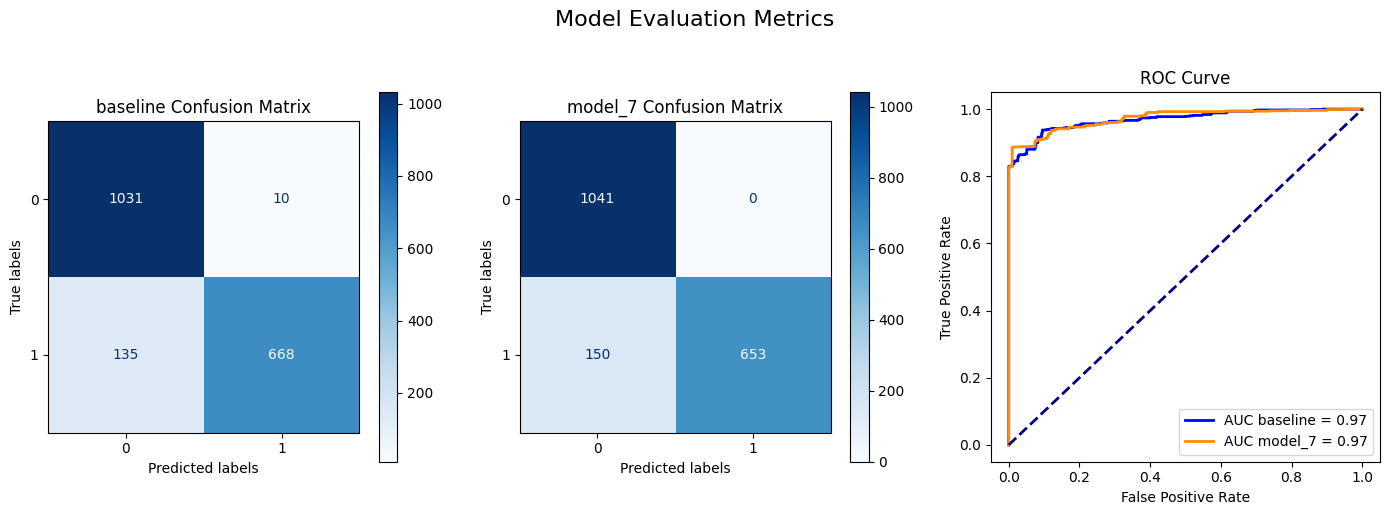

In [19]:
eval.plot_metrics()